# Week 5 - Stats Fundamentals & Correlation Analysis 

This notebook covers:
- Basic statistical concepts
- Understanding variance, standard deviation, mean, medium
- Correlation concepts (positive, negative, none)
- Building a correlation heatmap with seaborn
- Interpreting correlation results for health data

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



sns.set(style="whitegrid")

In [3]:
df = pd.read_csv('/Users/harmonyedgley/Downloads/healthcare-dataset-stroke-data.csv')

In [4]:
# This keeps the numeric values
df = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']]

In [5]:
corr_matrix = df.corr()
corr_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


## Intepretation
Based on the correlation matrix, the main two variables that seem most correlated with stroke:
- Age (age -> stroke: 0.245)
- heart_disease (heart_disease -> stroke: 0.135)

While both hypertension and avg_glucose_level correlate, they are weaker. Even more so, correlation reveals that BMI and stroke do not have a strong linear relationship.

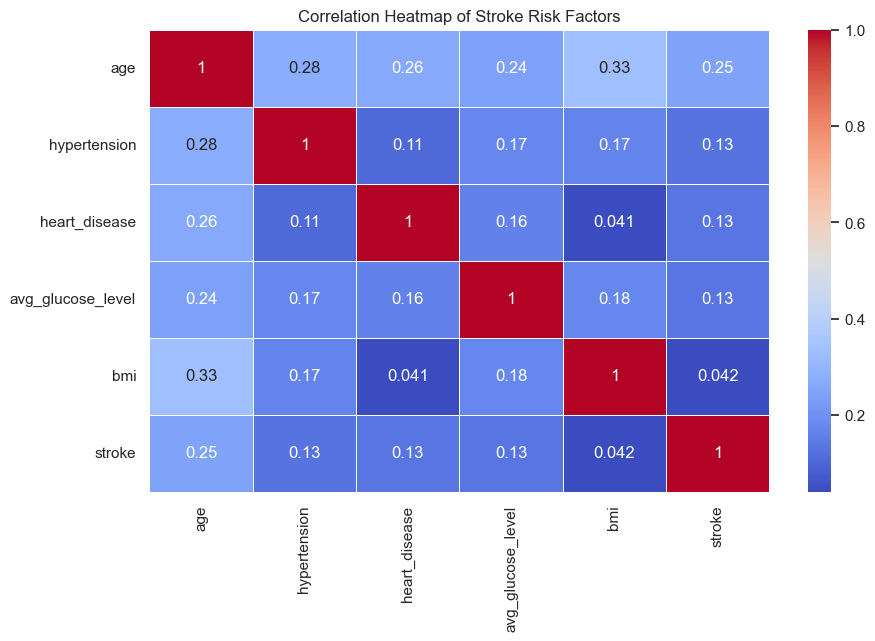

In [6]:
# Generate Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Stroke Risk Factors")
plt.show()

## Heatmap Interpretation
   - Age has the strongest correlation with stroke (0.25). From a statistical standpoint, this is not really how; however in medicine, age is a well known factor in stroke risk. Therefore, this aligns with real-world expectations.
   - Glucose level, heart disease, and hypertension all show weak but postive correlations (around 0.13). These are still medically valid as risk factors, just with mild statistical signal in this specifc dataset.
   - BMI is very weak and is nearly uncorrelated (0.042). While this may seem surprisingly low, the dataset originally had 201 missing BMI values.
   - Overall, the correlations are relatively low, which is typical in health datasets where multiple factors interact. The heatmap highlights which variables warrant deeper investigation in more advanced models.

In [9]:
# Statistical Testing (Average Glucose Level vs Stroke)

from scipy.stats import ttest_ind

stroke_group = df[df['stroke'] == 1]['avg_glucose_level']
no_stroke_group = df[df['stroke'] == 0]['avg_glucose_level']

t_stat, p_value = ttest_ind(stroke_group, no_stroke_group, equal_var=False)

t_stat, p_value

(np.float64(6.982411744792963), np.float64(2.4014366563697676e-11))

## Statistical Test Conclusion (Average Glucose Level vs Stroke)
To determine whether stroke patients differ in glucose level compared to non-stroke patients, an independent t-test was performed.
- t-statistic: 6.98
- p-value: 2.4 x 10^11
  
Because the p-value is extremely small, the result is statistically significant. 

This means:
- Stroke patients have significantly higher average glucose levels than patients without stroke. Hence, supporting the idea that elevated glucose levels may be an important risk factor associated with stroke. 